<a href="https://colab.research.google.com/github/atulhari/Deep-learning-tensorflow/blob/main/Intro_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part1: Into to Tensorflow
Tensorflow is an extensively used machine learning software library developed by Google Brain team. The tool was initially used for internal research and production at Google and was released in 2015 with a Apache License 2.0.

In this part we will introduce the fundamentals of tensorflow, explain how computations are represented and how to define a simple neural network.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.9.1'

## 1.1 Why is TensorFlow called TensorFlow?

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors, which are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions.

The ```shape``` of a Tensor defines its number of dimensions and the size of each dimension. The ```rank``` of a Tensor provides the number of dimensions (n-dimensions) -- you can also think of this as the Tensor's order or degree.

Let's first look at 0-d Tensors, of which a scalar is an example:

In [ ]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


1-d Tesnors are created using vecotrs and lists

In [ ]:
sports = tf.constant(["Tennis","Basketball"],  tf.string)
numbers = tf.constant([3.141592, 1.41421356237, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape [2]
`numbers` is a 1-d Tensor with shape [3]


For images we will need higher-rank tensors like 2d. Or even 4d tensors which include for example number of images, image height, image width and number of color channels

In [ ]:
matrix = tf.constant([[1,2,3],[4,5,6]], tf.float64)
assert isinstance(matrix, tf.Tensor), "Matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2
print("matrix is a {}-d Tensor with shape {}".format(tf.rank(matrix).numpy(),tf.shape(matrix)))

matrix is a 2-d Tensor with shape [2 3]


Lets create a 4d Tensor which contains the number of images, image width, image height and color channels.
If there are 10 images which are 256x256 rgb image, this would be as follows.

In [ ]:
images = tf.zeros([10,256,256,3])
assert isinstance(images, tf.Tensor), "The Matrix should be tf Tensor object"
assert tf.rank(images).numpy() == 4, "Matrix should have a rank 4"
assert tf.shape(images).numpy().tolist() == [10,256,256,3], "Matrix shape is incorrect"

Its clear that the shape of the tensor gives the number of elements in each tensor dimension which makes it really usefull.

We can also use slicing to access tensors with higher-rank.

In [ ]:
row_vector = matrix[1]
column_vector = matrix[:,1]
scalar = matrix[0,1]

print("row _vector: {}".format(row_vector.numpy()))
print("column_vector: {}".format(column_vector.numpy()))
print("scalar: {}".format(scalar.numpy()))

row _vector: [4. 5. 6.]
column_vector: [2. 5.]
scalar: 2.0


## 1.2 Computations on Tensors

A good way to visualize computations in tensorflow is in terms of graphs. We define graphs as Tensors which holds the data and mathematical operations. Lets look at a simple example.
![image.png](attachment:image.png)


In [ ]:
# create nodes of the graph and initialize them with data
a = tf.constant(1)
b = tf.constant(2)

# Perform addition operation
c1 = tf.add(a,b)
c2 = a + b # TensorFlow will override the "+" operation so that it will be able to act on Tensors
print(c1)
print(c2)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


Lets consider a bit more complicated graph now.
![image.png](attachment:image.png)

In [ ]:
# Create nodes
def func(a,b):
    c = tf.add(a,b)
    d = tf.subtract(b,1)
    e = tf.multiply(c,d)
    return e


Now we can use the function func to compute the above graph for any given inputs a,b.

In [ ]:
a, b =1.5, 2.5
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


Its good to note that thet Tensor has no shape, as it is a single scalar value.

## 1.3 Neural networks in TensorFlow
Neural networks can be defined in TensorFlow, which uses a high-level API called Keras that provides a powerful and intuitive framework for building and training deep learning models.


### A simple perceptron
Perceptron is a just one dense layer defined by:
$y = \sigma(Wx+b)$,
where,\
$W$: weights\
$b$: bias\
$x$: input\
$\sigma$: sigmoid activation\
$y$: output\
We can visualize the operation using a graph:
![image.png](attachment:image.png)

Tensor can flow through abstract types called layers. The layers are the fundamental blocks of neural networks.\
Layers implement common neural network operations, and are used to:

* Update the weight
* Compute losses
* Define inter-layer connectivity

We will define a `layer` to implement the perceptron.

In [ ]:
# Defining a network layer
# n_output_nodes: number of output nodes
# input_shape: shape of input
# x: input to the layer

class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, n_output_nodes):
        super(MyDenseLayer,self).__init__()
        self.n_output_nodes = n_output_nodes

    def build(self, input_shape):
        d = int(input_shape[-1])
        # Define and initialize paramters: a weight matrix W and bias b
        # parameter initialization is random
        self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # Note the dimensionality
        self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # Note the dimensionality

    def call(self, x):
        z = tf.add(tf.matmul(x, self.W), self.b)
        y = tf.sigmoid(z)
        return y

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = MyDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]],shape=(1,2))
y = layer.call(x_input)
print(y.numpy())


[[0.26978594 0.45750415 0.6653695 ]]


This was an example to construct our own single layer neural network. In practice we could use the layers defined by keras. For example a `Dense` layer. Also insted of using a single layer we will use a `Sequential` model from keras and a single `Dense` layer to define our network.
With the Sequetial API we can readily create NN by stacking together the layers like building blocks.

In [ ]:
# inport relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define the number of outputs
n_output_nodes = 3

# define the model
model = Sequential()

# define the layer
Dense_layer = Dense(units=n_output_nodes, activation='sigmoid')
model.add(Dense_layer)

x_input = tf.constant([[1,2.]],shape=(1,2))
output = model(x_input)
print(output)


tf.Tensor([[0.5607363  0.65668976 0.1249697 ]], shape=(1, 3), dtype=float32)


In addition to using the `Sequential` API we can also define neural network by directly subclassing the `Model` class. Using subclassing we can create a class of our model, an then define the forward pass through the network using just the `call` function. Subclassing gives the flexibility to make custom layers, custom training loops, custom activation function and custom models. We will now try to define the same model using subclassing rather than using `Sequential` model.

In [ ]:
# Defining a model using subclassing
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubClassModel(tf.keras.Model):
    # In __init__, we define the Model's layers
    def __init__(self, n_ouput_nodes):
        super(SubClassModel, self).__init__()
        self.dense_layer = Dense(units=n_output_nodes, activation="sigmoid")

    # In the the call function we define the Model's forward pass.
    def call(self, inputs):
        return self.dense_layer(inputs)

n_output_nodes = 3
model = SubClassModel(n_output_nodes)
x_input = tf.constant([[1,2.]], shape=(1,2))
print(model.call(x_input))


tf.Tensor([[0.6504887  0.4782816  0.83736604]], shape=(1, 3), dtype=float32)


Subclassing can give lot of flexibility in defining custom models. For example we can pass a boolean argument to the call function to define seperate network behaviour, for example during training and inference.

For example, lets suppose for some instance we want the network to output the input without any pertubation. We define the boolean argument `isidentiy` to control this behaviour.

In [ ]:
#Defining a model with model using subclassing and specifuying custom behaviour
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):
    # As before, ini __init__ we define the Model's layers
    # This part remains unchanged sicne we desire a forward pass model
    def __init__(self, n_output_nodes):
        super(IndetityModel, self).__init__()
        self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

    def call(self, inputs, isidentity=False):
        x = self.dense_layer(inputs)
        if isidentity:
            return inputs
        return x

    n_output_node = 3
    model = IdentityModel(n_output_node)

    x_input = tf.constant([[1,2.]], shape=(1,2))
    out_activate = model.call(x_input, True)
    out_identity = model.call(x_input, False)



NameError: name 'IdentityModel' is not defined

## 1.4 Automatic differentiation in TensorFlow
Automatic differentiation is an important part of TensforFlow that allows us to calculate derivatives efficiently at constant time. Usually called 'auto-diff' and also has forward and reverse mode.

An autodiff is the backbone for training with backpropogation. We will use TensforFlow GradientTape `tf.GradientTape` to trace the operation of computing grdients later.

When we do forward pass all the forward pass operartions are recorded on the tepe. Then to compute the gradients the tape can be played backwards. By default the tape is discarded after it is played backwrds, hence we can only compute one gradient. However, we can create a `persistent` gradient tape to compute multiple gradients over the same computation.

Let us look at how we can compute gradients using GradientTape and access them from computation. We define a simple function $y =x^2$ and compute the gradient

In [ ]:
### Using gradient tape to compute gradients

# y = x^2
# Example x = 3.0

x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
    # Define the function
    y = x * x
    # find the differentiation of y wrto x
    dy_dx = tape.gradient(y,x)

assert dy_dx.numpy() == 6.0


In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimise a loss function. Now that we know how to use `GradientTape` to compute and access derivatives we can look at example where we use auto-diff and SGD to find the minimum of $L=(x-x_f)^2$. Here $x_f$ is a variable for the desired value we are trying to optimize and $L$ is the loss that we want to try to minimize.

Analytically we know that $x_{min}=x_f$ will minimize the loss $L$

initializing x= [[-0.92759573]]


Text(0, 0.5, 'x value')

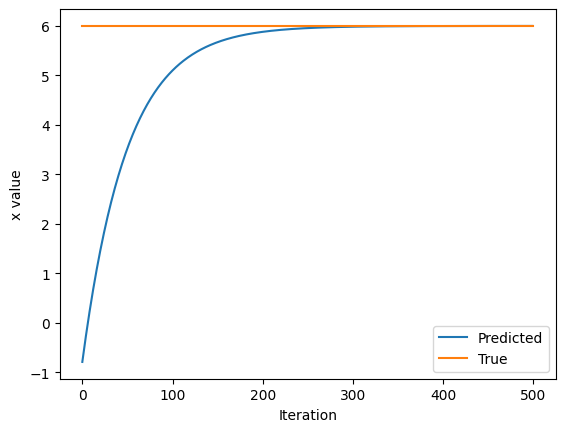

In [ ]:
### Function minimization with auto-diff and SGD ###

# initialise x with a random variable
x =  tf.Variable([tf.random.normal([1])])
print("initializing x= {}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []

# The target value
x_f = 6

# We will perform SGD for a number of iterationa and in each iteration,
# we will compute the loss, the gradient w.r.to x and the, do SGD update

for i in range(500):
    with tf.GradientTape() as tape:
        loss = (x - x_f) * (x - x_f)
        # compute the gradient of loss with respect to x
        grad = tape.gradient(loss, x)

        # SGD update based on learning rate
        x_new = x - learning_rate * grad
        # update the value of x
        x.assign(x_new)
        history.append(x.numpy()[0])

#plot the evolution of x as we optimize
plt.plot(history)
plt.plot([0,500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
